In [1]:
from tensorflow import keras

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tqdm import tqdm
from numpy import random
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## Data is imbalanced. Fire dataset contains 755 png images while non fire dataset contains 244 png images. Generate ~511 non fire images:

In [6]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [8]:
'''
img = load_img('data/fire_dataset/non_fire_images/non_fire.1.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1, save_to_dir='data/fire_dataset/non_fire_images', save_prefix='non_fire', save_format='png'):
    i += 1
    if i > 20:
        break

x.shape
(1, 638, 960, 3)
'''

In [107]:
# Tried this on a test batch for i = 1 (img defined above)
def gen_images(path, num, fire):
    '''
    Reads in image, coverts to array, reshapes, applies datagen 20 times.
    Repeats num times.
    Saves to data/fire_dataset/non_fire_images
    '''
    if fire == True:
        for i in tqdm(range(28, num)):
            img = load_img(f'{path}/fire.{num}.png')
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            i=0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=f'{path}/', save_prefix='fire', save_format='png'):
                i += 1
                if i > 20:
                    break
    else:
        for i in tqdm(range(28, num)):
            img = load_img(f'{path}/non_fire.{num}.png')
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            i=0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=f'{path}/', save_prefix='non_fire', save_format='png'):
                i += 1
                if i > 20:
                    break

In [27]:
#gen_images(num=27)
# DO NOT NEED TO RUN AGAIN :)

## Now my fire and non fire image datasets are balanced!

## Generating a larger dataset: 2000 images

In [110]:
positive_fire_path = 'data/fire_dataset/fire_images'
negative_fire_path = 'data/fire_dataset/non_fire_images'

In [109]:
#gen_images(positive_fire_path, 65, fire=True)
# DO NOT NEED TO RUN AGAIN :)

In [108]:
#gen_images(negative_fire_path, 65, fire=False)
# DO NOT NEED TO RUN AGAIN :)


100%|██████████| 37/37 [22:44<00:00, 36.87s/it]


In [120]:
fire = os.listdir(positive_fire_path)
notfire = os.listdir(negative_fire_path)

In [121]:
len(fire), len(notfire)

(1630, 1525)

## Next steps: vectorize images and append target column

In [117]:
def im_to_array(file_path, color_mode='rgb', img_size=(480, 640, 3)):
    '''
    Reads in images, resizes and stakcs them into an array, then shuffles.
    '''
    images = os.listdir(file_path)
    length = len(images)
    X = np.zeros([length, img_size[0], img_size[1], img_size[2]], dtype=np.uint8)
    
    for i in range(length):
        image_title = images[i]
        image_dir = os.path.join(file_path, image_title)
        pixels = load_img(image_dir, color_mode=color_mode, target_size=img_size)
        X[i] = pixels
    
    new_index = np.random.permutation(length)
    X = X[new_index]
    
    return X

In [115]:
positive_fire = im_to_array(positive_fire_path)

In [123]:
negative_fire = im_to_array(negative_fire_path)

## Test that it worked:

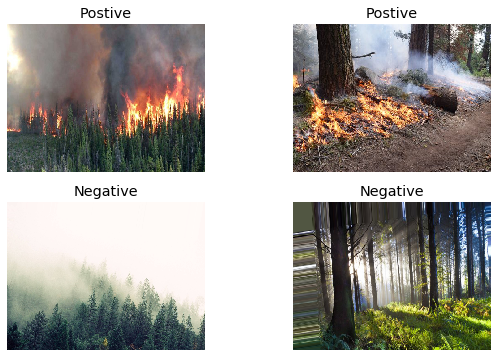

In [128]:
samp = np.concatenate((positive_fire[:2], negative_fire[:2]), axis=0)

fig, ax = plt.subplots(2, 2, figsize=(10,6))
fig.subplots_adjust(wspace=.05)
for i, img in enumerate(samp):
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
    if i<2:
        ax[i//2, i%2].title.set_text('Postive')
    else:
        ax[i//2, i%2].title.set_text('Negative')
plt.show()

## Label the dataset as fire or not fire

In [133]:
positive_fire.shape, negative_fire.shape

((1630, 480, 640, 3), (1525, 480, 640, 3))

In [132]:
positive = np.ones((len(positive_fire), 1))
negative = np.zeros((len(negative_fire), 1))

In [134]:
X = np.concatenate((positive_fire, negative_fire)) 
y = np.concatenate((positive, negative))

In [135]:
X.shape, y.shape

((3155, 480, 640, 3), (3155, 1))

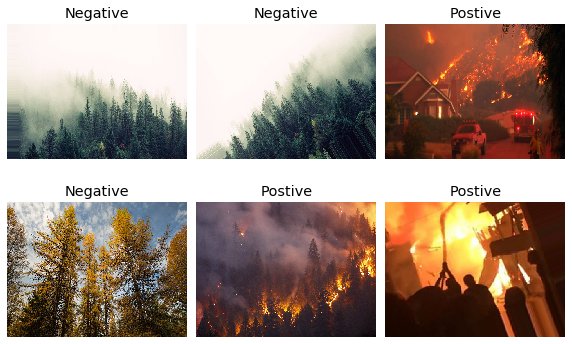

In [137]:
new_index = np.random.permutation(len(X))
X = X[new_index]
y = y[new_index]
samp = X[:6]

fig, ax = plt.subplots(2, 3, figsize=(10,6))
fig.subplots_adjust(wspace=.05)
for i, img in enumerate(samp):
    ax[i//3, i%3].imshow(img)
    ax[i//3, i%3].axis('off')
    if y[i]:
        ax[i//3, i%3].title.set_text('Postive')
    else:
        ax[i//3, i%3].title.set_text('Negative')
plt.show()